<h1>POSTTEST 8</h1>
<h3>Ricky Novenda Putra</h3>
<h3>2009106073</h3>

<h4>Kita Install dulu Library yang dibutuhkan</h4>

In [5]:
#import  libraries TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


<h3>Praproses Data</h3>

<h4>Data harus diproses terlebih dahulu.</h4>

In [14]:
name_class = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

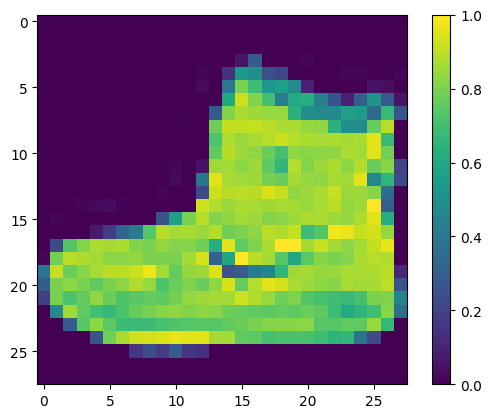

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

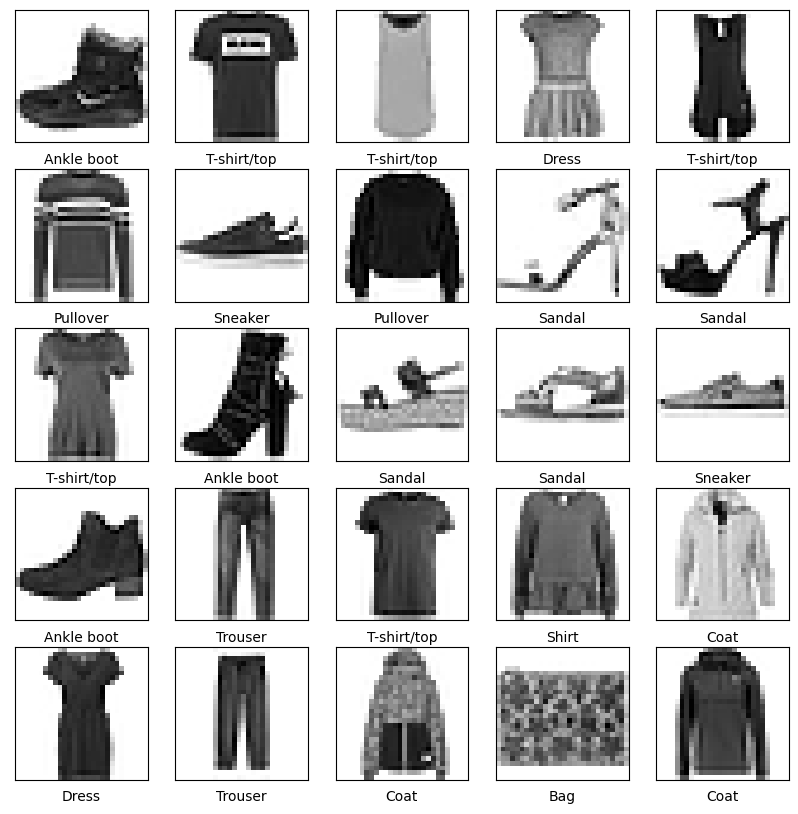

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(name_class[train_labels[i]])
plt.show()

<h3>Sequence Modell</h3>

<h4>Sequence Model adalah pemrosesan pada input yang berurutan, misalnya pemrosesan bahasa alami (NLP), audio, atau data sekuensial lainnya. Dalam konteks deep learning, model yang berkaitan adalah recurrent neural network (RNN).</h4>

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
#Menyesuaikan Model
history = model.fit(train_images, train_labels, epochs=10,
    verbose=2,
    validation_data=(test_images, test_labels))

#Evaluasi
test_acc = model.evaluate(test_images,  test_labels)
print("\n test loss and accuracy :",test_acc)

Epoch 1/10
1875/1875 - 7s - loss: 1.0853 - accuracy: 0.6619 - val_loss: 0.7192 - val_accuracy: 0.7494 - 7s/epoch - 4ms/step
Epoch 2/10
1875/1875 - 6s - loss: 0.6369 - accuracy: 0.7712 - val_loss: 0.6041 - val_accuracy: 0.7822 - 6s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.5604 - accuracy: 0.7998 - val_loss: 0.5564 - val_accuracy: 0.7980 - 5s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.5178 - accuracy: 0.8172 - val_loss: 0.5327 - val_accuracy: 0.8036 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 5s - loss: 0.4909 - accuracy: 0.8275 - val_loss: 0.5103 - val_accuracy: 0.8171 - 5s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.4718 - accuracy: 0.8331 - val_loss: 0.4924 - val_accuracy: 0.8234 - 5s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 6s - loss: 0.4564 - accuracy: 0.8400 - val_loss: 0.4858 - val_accuracy: 0.8255 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.4447 - accuracy: 0.8432 - val_loss: 0.4698 - val_accuracy: 0.8311 - 5s/epoch - 3ms/step
Epoch 9/

<h3>Membuat Prediksi</h3>

In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.0151676e-06, 5.3486520e-08, 1.1131115e-05, 3.7575019e-06,
       8.2619608e-06, 1.6453257e-01, 1.5639247e-05, 2.3419420e-01,
       6.0122958e-03, 5.9522104e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

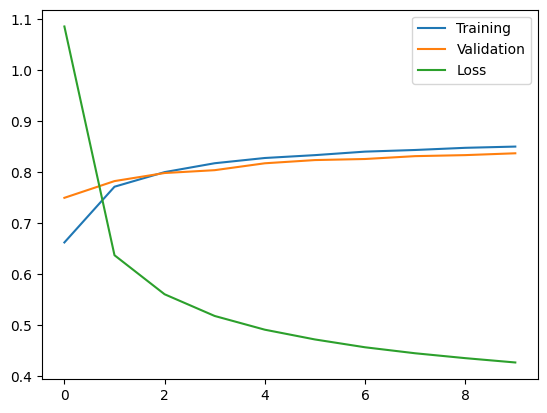

In [24]:
plt.plot(range(len(history.history['accuracy'])),
history.history['accuracy'],
label = 'Training')

plt.plot(range(len(history.history['val_accuracy'])),
history.history['val_accuracy'],
label = 'Validation')

plt.plot(range(len(history.history['loss'])),
history.history['loss'],
label = 'Loss')

plt.legend()
plt.show()

<h3>Membuat Fungsi Pembantu Untuk Plot Prediksi</h3>

In [25]:
def plot_image(i, predictions_array, true_label, img):
      true_label, img = true_label[i], img[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(img, cmap=plt.cm.binary)

      predicted_label = np.argmax(predictions_array)
      if predicted_label == true_label:
            color = 'blue'
      else:
            color = 'red'
            
            plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

<h3>Prediction</h3>

<h4>Label prediksi yang benar akan berwarna biru sedangkan label prediksi yang salah akan berwarna merah.</h4>

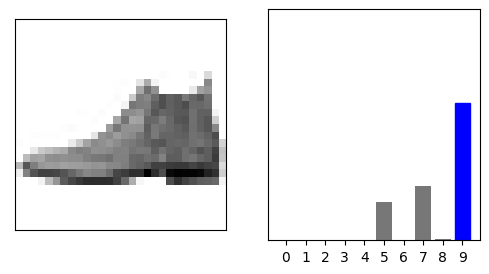

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

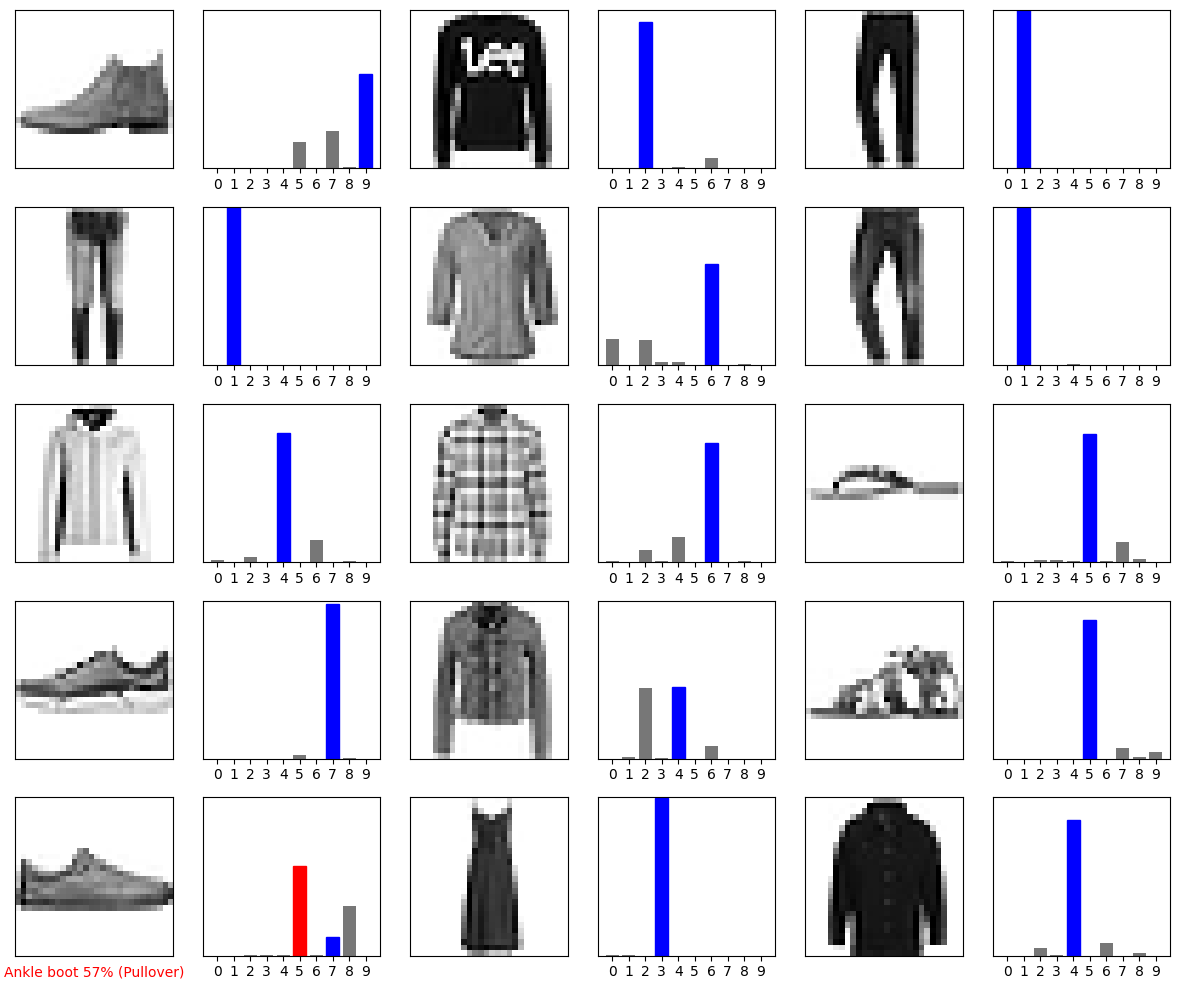

In [27]:
# Plot gambar uji X pertama, label prediksinya, dan label sebenarnya.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()